# Comparison including tidal disruption in subhalos

This is a example notebook to use the 21cm Forest code for computing and plotting the relevant quantities, such as the mean optical depth for host and subhalo contributions, the maximum impact parameter and the cumulative number of absorbers.

In [1]:
%matplotlib inline
from IPython.display import HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.rcParams.update({'font.size': 15})

from Source.forest import Forest
from Source.utils import GetTemperature, scinot

# Redshifts to evaluate the 21 cm forest
zvec = [10]

# Some host halo masses to plot several quantities
Ms = [1.e5, 1.e6, 1.e7]

# Colors and linestyles
colors = ["c","m","b"]
lines = ["-","--"]

# Heating efficiency of the IGM
# 0 for adiabatic cooling, 1.e55 or 1.e56 for mild or more extreme scenarios, using 21cmFAST computations
zetax = 0. #1.e55

# Create 21cmForest instances without subhalo contribution
forest_z_nosub = [Forest(z, GetTemperature(z, zetax), use_subhalos=0) for z in zvec]

# Create 21cmForest instances including the subhalo contribution
forest_z_sub = [Forest(z, GetTemperature(z, zetax), use_subhalos=1) for z in zvec]

# Create 21cmForest instances including the subhalo contribution, with tidal disruption
forest_z_tid = [Forest(z, GetTemperature(z, zetax), use_subhalos=1, tidal=True) for z in zvec]

/Users/omena/Downloads/ForestSubhalos/BOSC/Source/forest.py:89: RuntimeWarning: invalid value encountered in true_divide
  self.boost_factor_arr = np.where(self.tau_host_arr==0., 0., self.tau_sub_arr/self.tau_host_arr)


Optical depth subhalo contribution file for z=10, Tk=2.188e+00 K does not exist. Generating...


Generating optical depth subhalo contribution file: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:47<00:00,  1.05it/s]


## Subhalo vs host optical depth

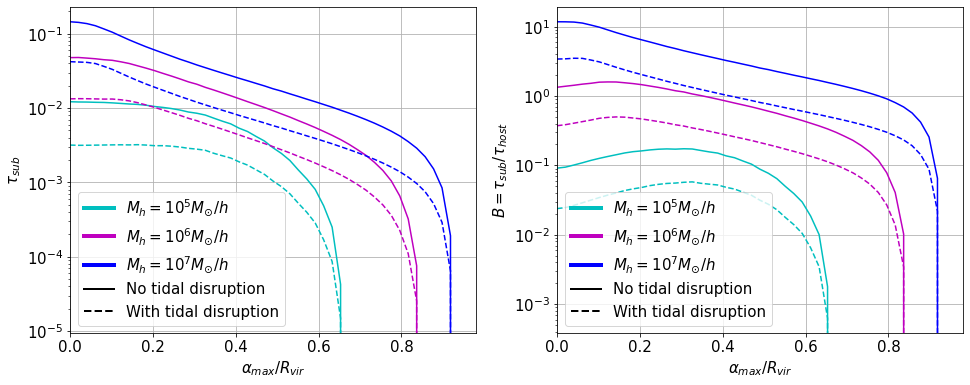

In [2]:
fig, (ax2, ax3) = plt.subplots(1,2, figsize=(16,6))

for iz, z in enumerate(zvec):

    forest = forest_z_sub[iz]
    
    alfas = forest.impparam[:-1]
    
    for iM, M in enumerate(Ms):
        
        #ax1.plot( alfas, forest.tau_host_int(M, alfas), color=colors[iM], linestyle=lines[0] )
        ax2.plot( alfas, forest.tau_sub_int(M, alfas), color=colors[iM], linestyle=lines[0] )
        ax3.plot( alfas, forest.boost_factor_int(M, alfas), color=colors[iM], linestyle=lines[0] )
        
    forest = forest_z_tid[iz]
    
    alfas = forest.impparam[:-1]
    
    for iM, M in enumerate(Ms):
        
        #ax1.plot( alfas, forest.tau_host_int(M, alfas), color=colors[iM], linestyle=lines[1] )
        ax2.plot( alfas, forest.tau_sub_int(M, alfas), color=colors[iM], linestyle=lines[1] )
        ax3.plot( alfas, forest.boost_factor_int(M, alfas), color=colors[iM], linestyle=lines[1] )

leg = []
for mm, M in enumerate(Ms):
    leg.append( Line2D([0], [0], color=colors[mm], linestyle="-", lw=4, label=r"$M_h=$"+scinot(M)+"$ M_{\odot}/h$") )

leg.append( Line2D([0], [0], color="k", linestyle=lines[0], lw=2, label="No tidal disruption" ) ) 
leg.append( Line2D([0], [0], color="k", linestyle=lines[1], lw=2, label="With tidal disruption" ) ) 


#ax1.set_xlim(forest.impparam[0],forest.impparam[-2])
ax2.set_xlim(forest.impparam[0],forest.impparam[-2])
ax3.set_xlim(forest.impparam[0],forest.impparam[-2])
#ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale("log")
#ax1.set_xlabel(r"$\alpha_{max}/R_{vir}$")
#ax1.set_ylabel(r"$\tau_{host}$")
#ax1.legend(handles=leg)
ax2.set_xlabel(r"$\alpha_{max}/R_{vir}$")
ax2.set_ylabel(r"$\tau_{sub}$")
ax2.legend(handles=leg)
ax3.set_xlabel(r"$\alpha_{max}/R_{vir}$")
ax3.set_ylabel(r"$B=\tau_{sub}/\tau_{host}$")
ax3.legend(handles=leg)
#ax1.grid()
ax2.grid()
ax3.grid()
fig.savefig("Plots/optical_depth_subhalos_tidal.pdf", bbox_inches='tight')

## Number of absorbers

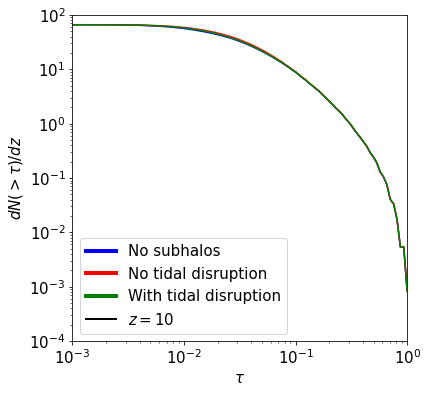

In [3]:
from scipy.ndimage import gaussian_filter1d

fig, (ax1) = plt.subplots(1,1,sharex=True,figsize=(6,6))

for iz, z in enumerate(zvec):

    forest = forest_z_sub[iz]
    cumulvec_sub, dercumulvec_sub = forest.num_absorbers()

    forest = forest_z_nosub[iz]
    cumulvec_nosub, dercumulvec_nosub = forest.num_absorbers()
    
    forest = forest_z_tid[iz]
    cumulvec_tid, dercumulvec_nosub = forest.num_absorbers()

    ax1.plot( forest.tauvec, cumulvec_nosub, linestyle=lines[iz], color="b" )
    ax1.plot( forest.tauvec, cumulvec_sub, linestyle=lines[iz], color="r" )
    ax1.plot( forest.tauvec, cumulvec_tid, linestyle=lines[iz], color="g" )
    

leg = []
leg.append( mpl.lines.Line2D([0], [0], color="b", linestyle="-", lw=4, label=r"No subhalos") )
leg.append( mpl.lines.Line2D([0], [0], color="r", linestyle="-", lw=4, label=r"No tidal disruption") )
leg.append( mpl.lines.Line2D([0], [0], color="g", linestyle="-", lw=4, label=r"With tidal disruption") )
for iz, z in enumerate(zvec):
    leg.append( mpl.lines.Line2D([0], [0], color="k", linestyle=lines[iz], lw=2, label="$z=$"+str(z) ) )    

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.set_xlabel(r"$\tau$")
ax1.set_ylabel(r"$dN(>\tau)/dz$")


ax1.legend(handles=leg)

ax1.set_ylim(1.e-4, 1.e2)
ax1.set_xlim(forest.tauvec[0], forest.tauvec[-1])
fig.savefig("Plots/cumul_tidal.pdf", bbox_inches='tight')

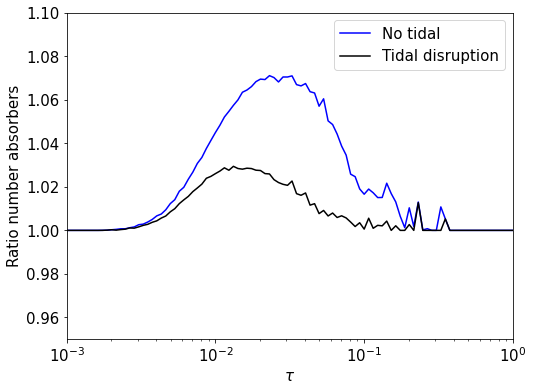

In [13]:
fig, (ax) = plt.subplots(1,1, figsize=(8,6))

for iz, z in enumerate(zvec):

    forest = forest_z_sub[iz]
    cumulvec_sub, dercumulvec = forest.num_absorbers()

    forest = forest_z_nosub[iz]
    cumulvec_nosub, dercumulvec = forest.num_absorbers()

    ax.semilogx( forest.tauvec, cumulvec_sub/cumulvec_nosub, linestyle=lines[iz], color="b", label="No tidal" )
    ax.semilogx( forest.tauvec, cumulvec_tid/cumulvec_nosub, linestyle=lines[iz], color="k", label="Tidal disruption" )

ax.set_xlim(forest.tauvec[0], forest.tauvec[-1])
ax.set_ylim(9.5e-1, 1.1)
ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"Ratio number absorbers")
ax.legend()